In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvYXB1cnZhL0RvY3VtZW50cy9Nb250ZS1DYXJsby1NZXRob2RzL2NoYXB0ZXJzL2VzdGltYXRpb24='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_10989/415568257.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/zipimport.py": 1733935783.8019211, "/home/apurva/miniconda3/lib/python3.12/codecs.py": 1733935783.6539242, "/home/apurva/miniconda3/lib/python3.12/encodings/aliases.py": 1733935783.917919, "/home/apurva/miniconda3/lib/python3.12/encodings/__init__.py": 1733935783.9739177, "/home/apurva/miniconda3/lib/python3.12/encodings/utf_8.py": 1733935784.0459163, "/home/apurva/miniconda3/lib/python3.12/abc.py": 1733935783.6419244, "/home/apurva/miniconda3/lib/python3.12/io.py": 1733935783.7019231, "/home/apurva/miniconda3/lib/python3.12/stat.py": 1733935783.765922, "/home/apurva/miniconda3/lib/python3.12/_collections_abc.py": 1733935783.6579242, "/home/apurva/miniconda3/lib/python3.12/genericpath.py": 1733935783.6859236, "/home/apurva/miniconda3/lib/python3.12/posixpath.py": 1733

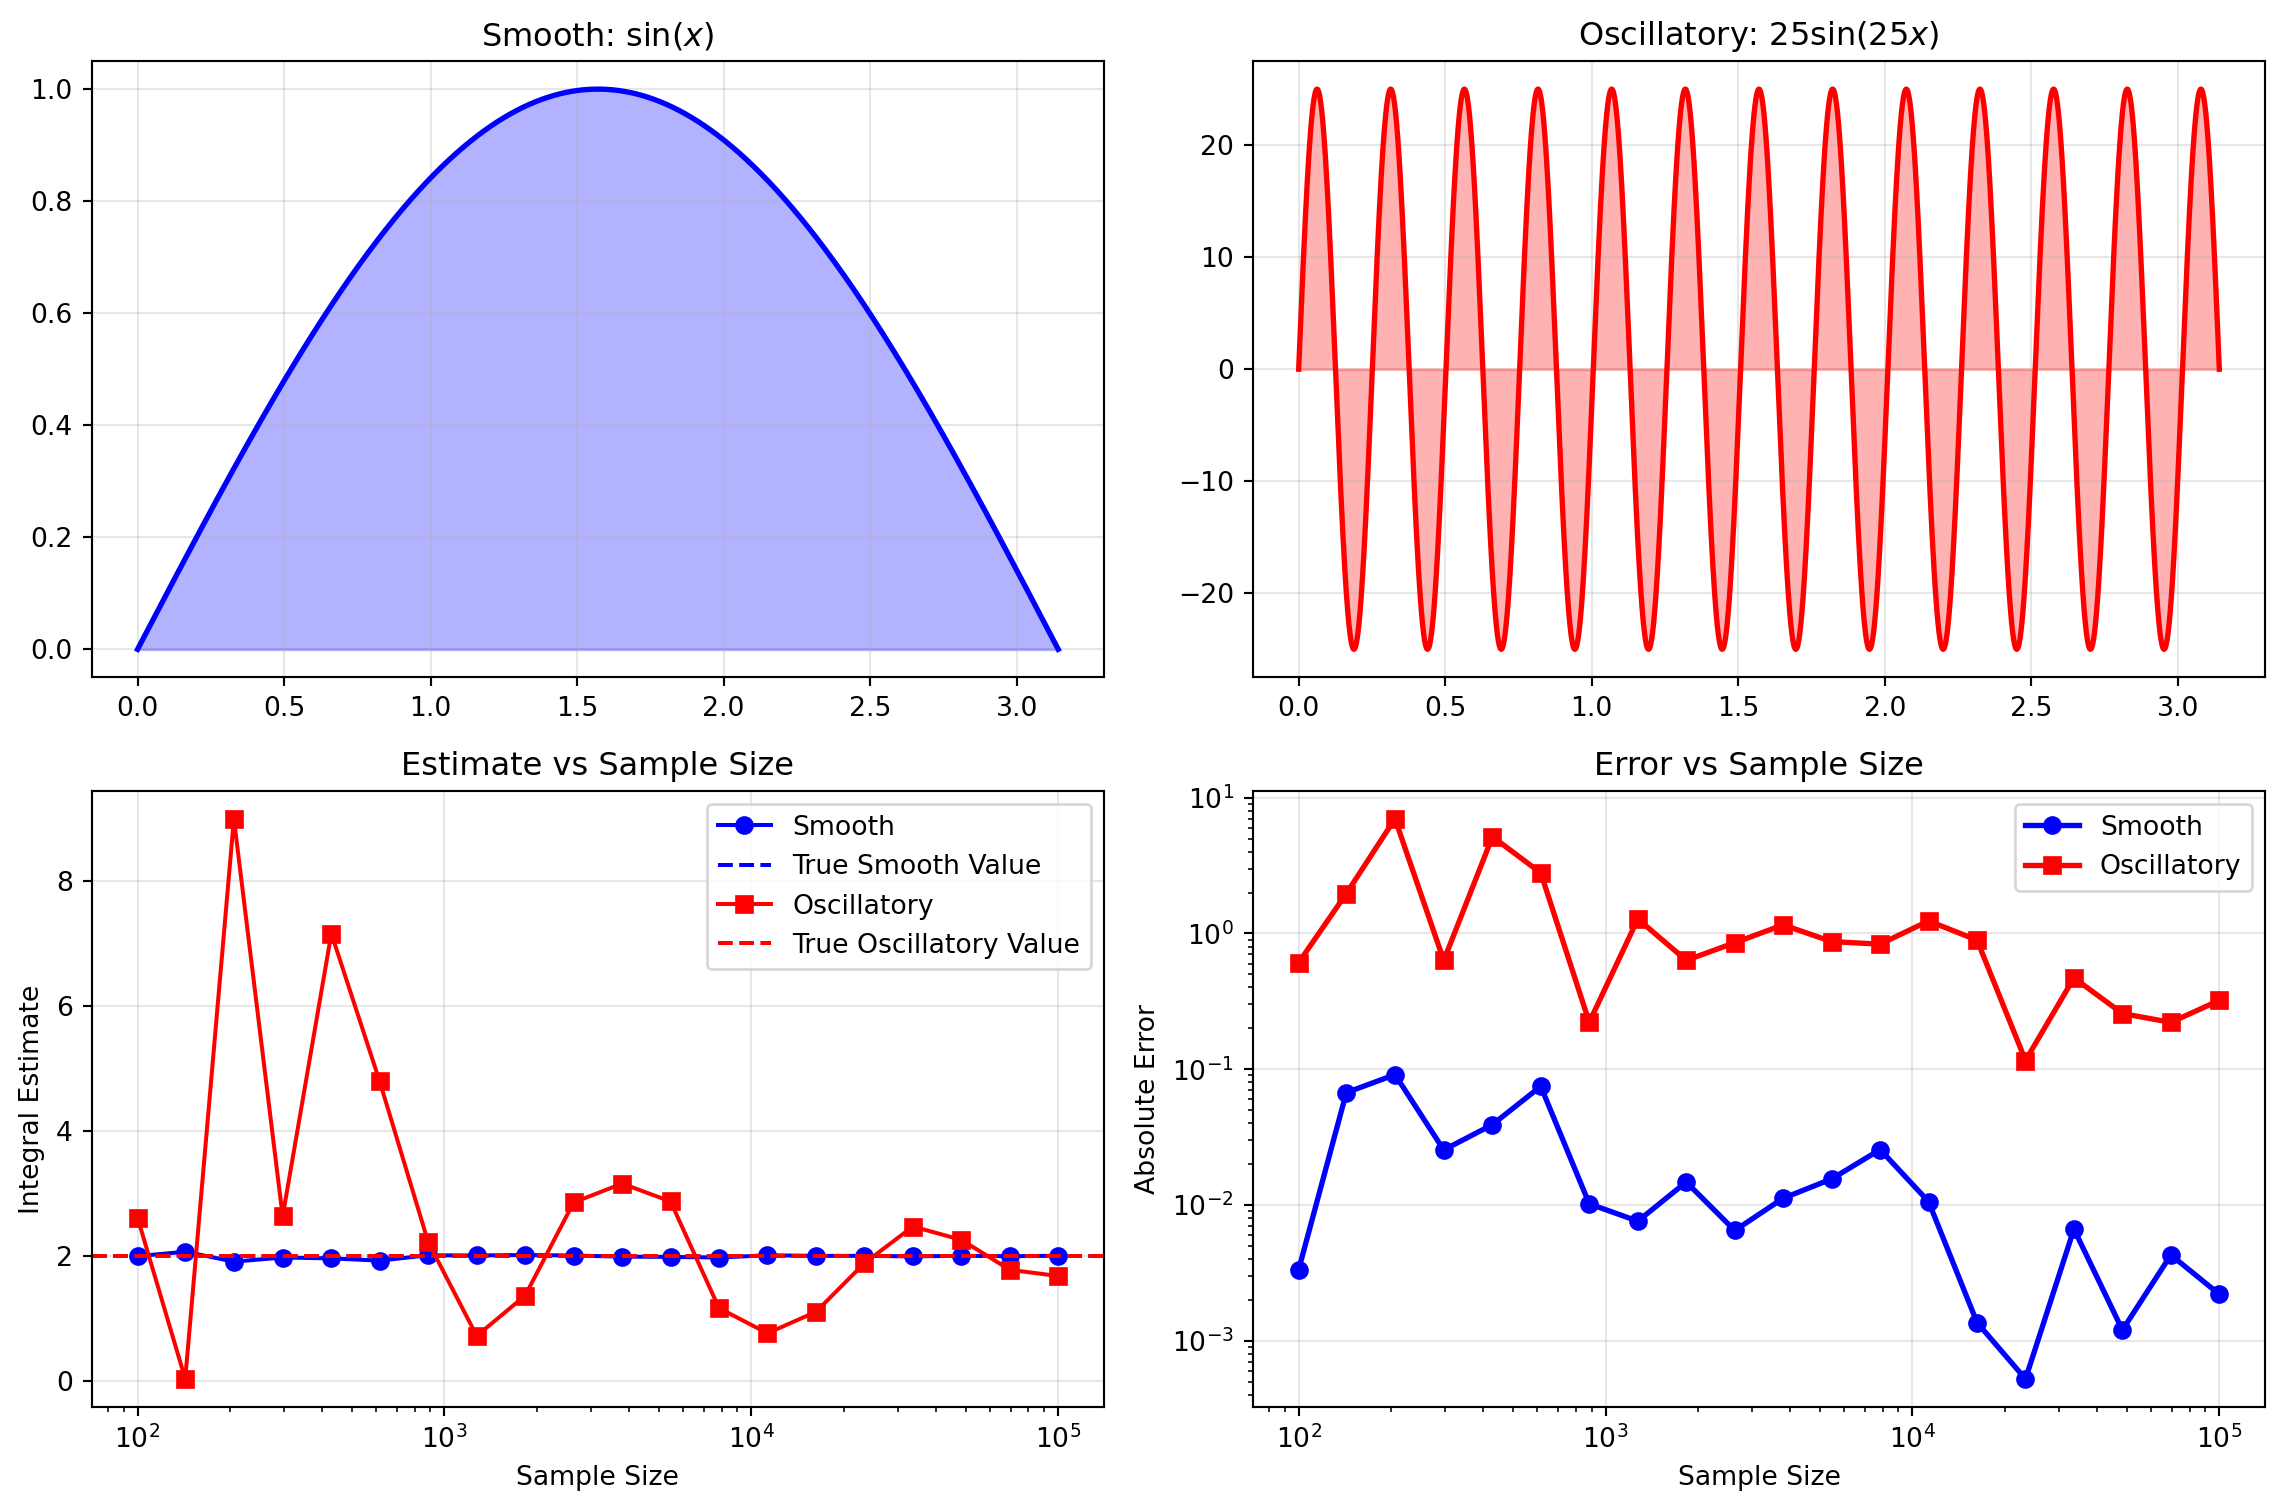

      Function  True Value  Mean Est   Error  Std Dev  Std Ratio
0       Smooth         2.0    2.0008  0.0008   0.0086          -
1  Oscillatory         2.0    1.9919  0.0081   0.6073  71.006457


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(0)

def monte_carlo_integrate(func, a, b, n_samples):
    x_samples = np.random.uniform(a, b, n_samples)
    return (b - a) * np.mean(func(x_samples))

# Function definitions and configuration
FUNCTIONS = {
    'smooth': {
        'func': lambda x: np.sin(x),
        'label': r'Smooth: $\sin(x)$',
        'color': 'blue',
        'marker': 'o',
        'true_value': 2.0
    },
    'oscillatory': {
        'func': lambda x: 25 * np.sin(25 * x),
        'label': r'Oscillatory: $25\sin(25x)$',
        'color': 'red', 
        'marker': 's',
        'true_value': 2.0
    }
}

# Integration bounds
a, b = 0, np.pi
x = np.linspace(a, b, 10000)
sample_sizes = np.logspace(2, 5, 20).astype(int)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axes.flatten()

# Plot functions and calculate estimates/errors
estimates = {}
errors = {}

for i, (name, config) in enumerate(FUNCTIONS.items()):
    func = config['func']
    color = config['color']
    
    # Plot function (top row)
    ax = ax1 if i == 0 else ax2
    y_vals = func(x)
    sns.lineplot(x=x, y=y_vals, ax=ax, color=color, linewidth=2)
    ax.fill_between(x, 0, y_vals, alpha=0.3, color=color)
    ax.set_title(config['label'])
    ax.grid(True, alpha=0.3)
    
    # Calculate estimates and errors for all sample sizes
    estimates[name] = [monte_carlo_integrate(func, a, b, n) for n in sample_sizes]
    errors[name] = [abs(est - config['true_value']) for est in estimates[name]]

# Plot estimates vs sample size
ax3.set_title('Estimate vs Sample Size')
for name, config in FUNCTIONS.items():
    ax3.plot(sample_sizes, estimates[name], 
             color=config['color'], marker=config['marker'], 
             label=name.capitalize(), linestyle='-')
    ax3.axhline(config['true_value'], color=config['color'], 
                linestyle='--', label=f'True {name.capitalize()} Value')

ax3.set_xscale('log')
ax3.set_xlabel('Sample Size')
ax3.set_ylabel('Integral Estimate')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot convergence errors
ax4.set_title('Error vs Sample Size')
for name, config in FUNCTIONS.items():
    ax4.loglog(sample_sizes, errors[name], 
               color=config['color'], marker=config['marker'],
               label=name.capitalize(), linewidth=2)

ax4.set_xlabel('Sample Size')
ax4.set_ylabel('Absolute Error')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Multiple estimates at fixed sample size for statistical analysis
n_test = 10000
n_runs = 25

multiple_estimates = {}
for name, config in FUNCTIONS.items():
    multiple_estimates[name] = [
        monte_carlo_integrate(config['func'], a, b, n_test) 
        for _ in range(n_runs)
    ]

# Create comparison DataFrame
comparison_data = []
std_devs = {}

for name, config in FUNCTIONS.items():
    estimates_list = multiple_estimates[name]
    mean_est = np.mean(estimates_list)
    std_dev = np.std(estimates_list)
    std_devs[name] = std_dev
    
    comparison_data.append({
        "Function": name.capitalize(),
        "True Value": config['true_value'],
        "Mean Est": mean_est,
        "Error": abs(mean_est - config['true_value']),
        "Std Dev": std_dev
    })

df_compare = pd.DataFrame(comparison_data)

# Add std ratio (avoiding division by zero)
smooth_std = std_devs['smooth']
osc_std = std_devs['oscillatory']
df_compare['Std Ratio'] = ['-', osc_std / smooth_std if smooth_std > 0 else np.nan]

# Display formatted results
print(df_compare.round(4))

/tmp/ipykernel_10989/761616975.py:88: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



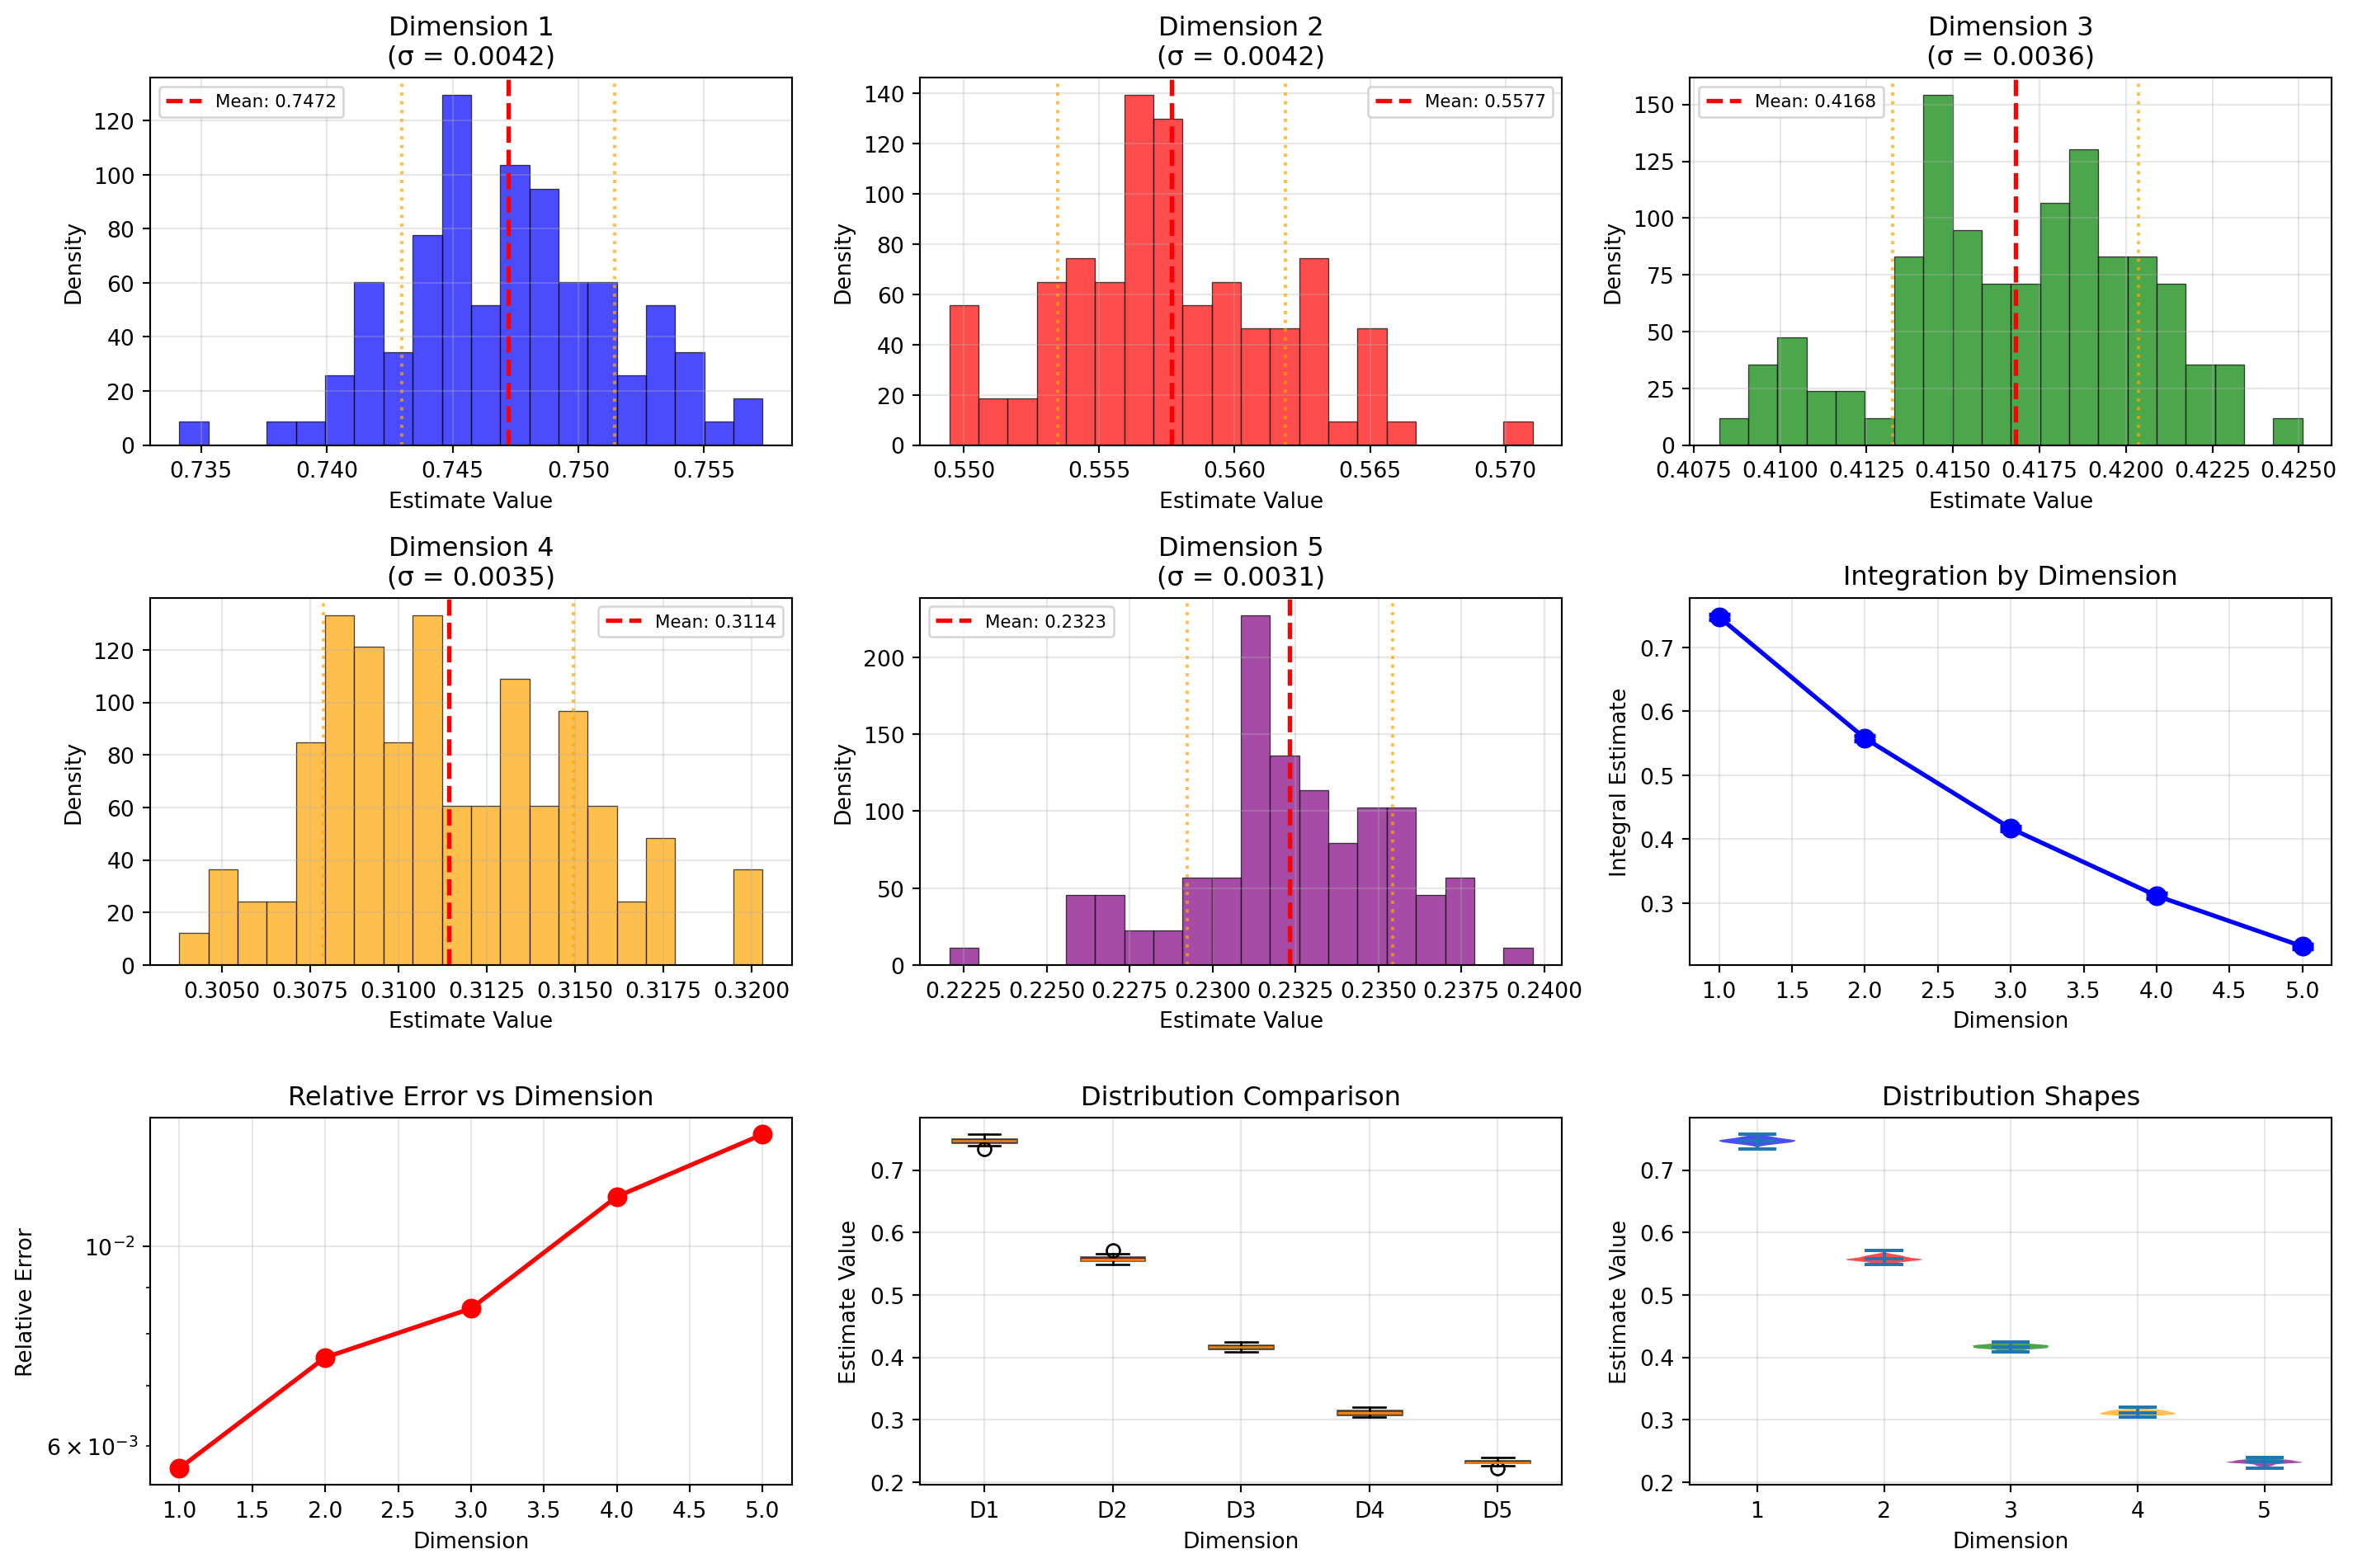


Multidimensional Integration Results From 2500 samples:
 Dimension  Estimate  Std Error  Rel Error
         1  0.747218   0.004232   0.005663
         2  0.557682   0.004197   0.007526
         3  0.416811   0.003557   0.008533
         4  0.311421   0.003541   0.011369
         5  0.232332   0.003099   0.013337

Detailed Statistics by Dimension:

Dimension 1:
  Mean: 0.747218
  Std:  0.004232
  Min:  0.734139
  Max:  0.757329
  95% CI: [0.739956, 0.755269]

Dimension 2:
  Mean: 0.557682
  Std:  0.004197
  Min:  0.549471
  Max:  0.571001
  95% CI: [0.549844, 0.565262]

Dimension 3:
  Mean: 0.416811
  Std:  0.003557
  Min:  0.408234
  Max:  0.425107
  95% CI: [0.409819, 0.423032]

Dimension 4:
  Mean: 0.311421
  Std:  0.003541
  Min:  0.303798
  Max:  0.320313
  95% CI: [0.304925, 0.318708]

Dimension 5:
  Mean: 0.232332
  Std:  0.003099
  Min:  0.222059
  Max:  0.239650
  95% CI: [0.225869, 0.237398]


In [3]:
#| label: fig-multidimensional
#| fig-cap: Monte Carlo advantage in higher dimensions

def multidimensional_example():
    """Demonstrate MC integration in higher dimensions"""
    
    # Function: exp(-||x||²) over unit hypercube
    def f_nd(points):
        return np.exp(-np.sum(points**2, axis=1))
    
    dimensions = [1, 2, 3, 4, 5]
    n_samples = 2500
    n_runs = 100
    
    results = []
    all_estimates = {}  # Store all estimates for each dimension
    
    for dim in dimensions:
        estimates = []
        for _ in range(n_runs):  # Multiple runs
            # Sample points in [0,1]^d
            points = np.random.uniform(0, 1, (n_samples, dim))
            f_values = f_nd(points)
            estimate = np.mean(f_values)  # Volume of unit cube is 1
            estimates.append(estimate)
        
        all_estimates[dim] = estimates
        mean_est = np.mean(estimates)
        std_est = np.std(estimates)
        
        results.append({
            'Dimension': dim,
            'Estimate': mean_est,
            'Std Error': std_est,
            'Rel Error': std_est/mean_est if mean_est > 0 else np.inf
        })
    
    df = pd.DataFrame(results)
    
    # Create subplots for each dimension plus summary plots
    fig = plt.figure(figsize=(15, 10))
    
    # Individual histograms for each dimension
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    
    for i, dim in enumerate(dimensions):
        ax = plt.subplot(3, 3, i+1)
        estimates = all_estimates[dim]
        
        # Histogram of estimates
        ax.hist(estimates, bins=20, alpha=0.7, color=colors[i], 
                density=True, edgecolor='black', linewidth=0.5)
        
        # Add vertical line for mean
        mean_val = np.mean(estimates)
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {mean_val:.4f}')
        
        # Add vertical lines for ±1 std
        std_val = np.std(estimates)
        ax.axvline(mean_val - std_val, color='orange', linestyle=':', alpha=0.7)
        ax.axvline(mean_val + std_val, color='orange', linestyle=':', alpha=0.7)
        
        ax.set_title(f'Dimension {dim}\n(σ = {std_val:.4f})')
        ax.set_xlabel('Estimate Value')
        ax.set_ylabel('Density')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
    
    # Summary plot: Estimates by dimension with error bars
    ax6 = plt.subplot(3, 3, 6)
    ax6.errorbar(df['Dimension'], df['Estimate'], 
                yerr=df['Std Error'], 
                fmt='bo-', linewidth=2, markersize=8, capsize=5, capthick=2)
    ax6.set_xlabel('Dimension')
    ax6.set_ylabel('Integral Estimate')
    ax6.set_title('Integration by Dimension')
    ax6.grid(True, alpha=0.3)
    
    # Summary plot: Relative error
    ax7 = plt.subplot(3, 3, 7)
    ax7.semilogy(df['Dimension'], df['Rel Error'], 'ro-', linewidth=2, markersize=8)
    ax7.set_xlabel('Dimension')
    ax7.set_ylabel('Relative Error')
    ax7.set_title('Relative Error vs Dimension')
    ax7.grid(True, alpha=0.3)
    
    # Box plot comparing all dimensions
    ax8 = plt.subplot(3, 3, 8)
    box_data = [all_estimates[dim] for dim in dimensions]
    bp = ax8.boxplot(box_data, labels=[f'D{d}' for d in dimensions], 
                     patch_artist=True)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax8.set_xlabel('Dimension')
    ax8.set_ylabel('Estimate Value')
    ax8.set_title('Distribution Comparison')
    ax8.grid(True, alpha=0.3)
    
    # Violin plot for better distribution visualization
    ax9 = plt.subplot(3, 3, 9)
    parts = ax9.violinplot(box_data, positions=dimensions, widths=0.6, showmeans=True)
    
    # Color the violin plots
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.7)
    
    ax9.set_xlabel('Dimension')
    ax9.set_ylabel('Estimate Value')
    ax9.set_title('Distribution Shapes')
    ax9.set_xticks(dimensions)
    ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nMultidimensional Integration Results From 2500 samples:")
    print(df.to_string(index=False, float_format='%.6f'))
    
    # Additional statistics
    print("\nDetailed Statistics by Dimension:")
    for dim in dimensions:
        estimates = all_estimates[dim]
        print(f"\nDimension {dim}:")
        print(f"  Mean: {np.mean(estimates):.6f}")
        print(f"  Std:  {np.std(estimates):.6f}")
        print(f"  Min:  {np.min(estimates):.6f}")
        print(f"  Max:  {np.max(estimates):.6f}")
        print(f"  95% CI: [{np.percentile(estimates, 2.5):.6f}, {np.percentile(estimates, 97.5):.6f}]")

multidimensional_example()